In [ ]:
# Install packages

import sys

# Equivalent of `python -m pip install <package>`
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install scikit-learn
!{sys.executable} -m pip install seaborn
!{sys.executable} -m pip install statsmodels

In [3]:
# Import statements and warning suppression

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import entropy
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [4]:
# Read csv

df = pd.read_csv('data/data.csv')
print(df.head())

   model_year     km  price  is_new  fuel_id  doors  transmission_id  \
0        2018  66715  88900   False        5      4                2   
1        2015  74660  97990   False        5      4                1   
2        2014  94000  51990   False        5      4                2   
3        2013  90500  39900   False        5      4                2   
4        2014    123  47990   False        5      4                1   

   body_style_id  model_id  
0              8      7174  
1              7       282  
2              8       351  
3              2       808  
4              1      1153  


# Data Stats Summaries

In [5]:
# Data Types and Null Values

# Display basic information and the first few rows of the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123358 entries, 0 to 123357
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype
---  ------           --------------   -----
 0   model_year       123358 non-null  int64
 1   km               123358 non-null  int64
 2   price            123358 non-null  int64
 3   is_new           123358 non-null  bool 
 4   fuel_id          123358 non-null  int64
 5   doors            123358 non-null  int64
 6   transmission_id  123358 non-null  int64
 7   body_style_id    123358 non-null  int64
 8   model_id         123358 non-null  int64
dtypes: bool(1), int64(8)
memory usage: 7.6 MB
None


In [5]:
# Convert non-numerical columns to numerical
# 1 = new, 0 = old

df["is_new"] = df.apply(lambda x: 1 if x["is_new"] == True else 0, axis=1)

In [7]:
# Data Preview

print(df.head())

   model_year     km  price  is_new  fuel_id  doors  transmission_id  \
0        2018  66715  88900       0        5      4                2   
1        2015  74660  97990       0        5      4                1   
2        2014  94000  51990       0        5      4                2   
3        2013  90500  39900       0        5      4                2   
4        2014    123  47990       0        5      4                1   

   body_style_id  model_id  
0              8      7174  
1              7       282  
2              8       351  
3              2       808  
4              1      1153  


In [8]:
# Data Stats Summary

print(df.describe())

          model_year            km         price         is_new  \
count  123358.000000  1.233580e+05  1.233580e+05  123358.000000   
mean     2016.191605  9.560432e+04  9.355207e+04       0.052660   
std         4.992464  4.013467e+05  1.073130e+05       0.223354   
min      1950.000000  0.000000e+00  0.000000e+00       0.000000   
25%      2013.000000  3.868475e+04  4.799000e+04       0.000000   
50%      2017.000000  7.200000e+04  6.950000e+04       0.000000   
75%      2020.000000  1.100000e+05  1.048900e+05       0.000000   
max      2024.000000  9.999999e+06  8.490084e+06       1.000000   

             fuel_id          doors  transmission_id  body_style_id  \
count  123358.000000  123358.000000    123358.000000  123358.000000   
mean        4.475105       3.860779         1.599304       4.556535   
std         1.170359       0.503729         0.517557       3.793997   
min         1.000000       0.000000         1.000000       1.000000   
25%         5.000000       4.000000      

# Conclusions from Data Summaries

## Columns to Process
- `is_new` is boolean and needs to be converted for easier analysis

## Outliers
The `km` and `price` columns have exceptionally high maximum values that suggest the presence of outliers. These need to be investigated further.

In [9]:
# Display column names

column_names = df.columns
column_names_list = list(column_names)
print(column_names_list)

['model_year', 'km', 'price', 'is_new', 'fuel_id', 'doors', 'transmission_id', 'body_style_id', 'model_id']


# Data Distributions

In [11]:
# Setting the aesthetic style of the plots
sns.set_style("whitegrid")

# Function to create distribution plots for given columns
def plot_distribution(column, data, bins=30, kde=True, log_scale=False):
    plt.figure(figsize=(10, 6))
    sns.histplot(data[column], bins=bins, kde=kde, log_scale=log_scale)
    plt.title(f'Distribution of {column}')
    plt.ylabel('Frequency')
    plt.xlabel(column)
    plt.show()

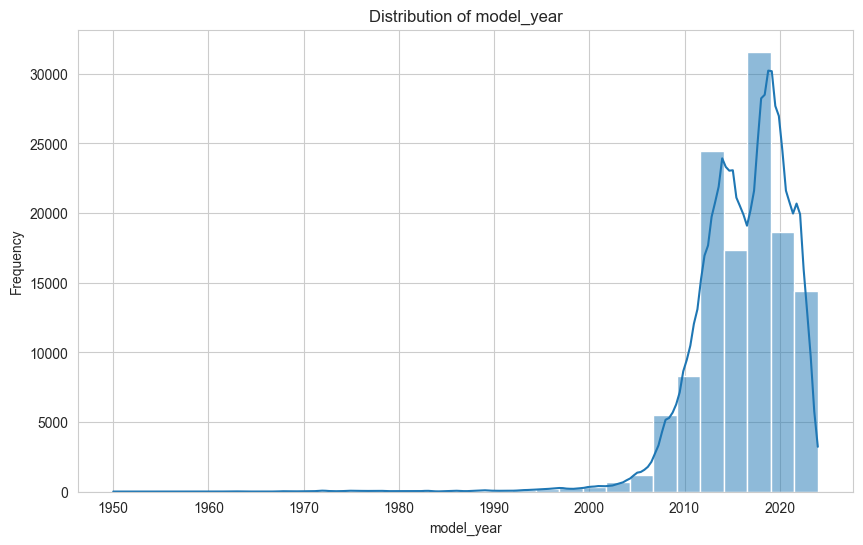

In [13]:
# Plotting distributions for 'model_year', 'km', and 'price'
plot_distribution('model_year', df)

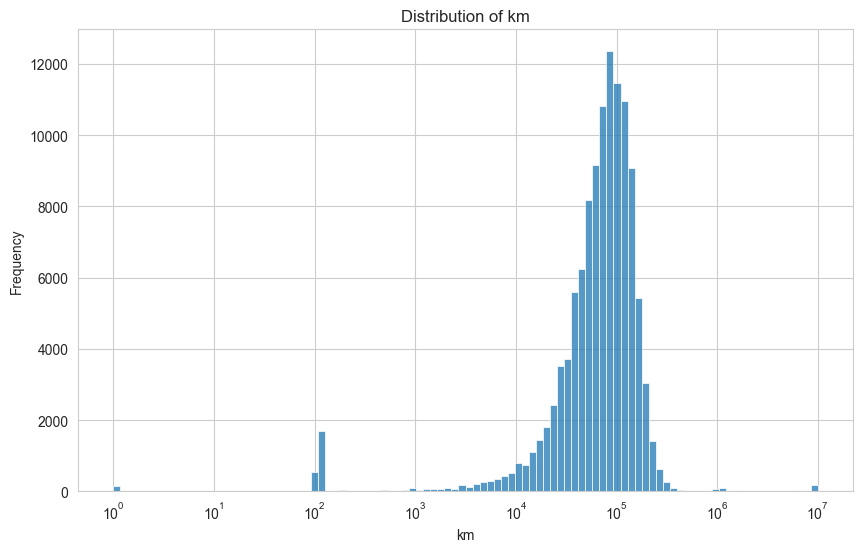

In [14]:
# Plotting distributions for 'km'
plot_distribution('km', df, bins=100, kde=False, log_scale=True)  # Large range of values

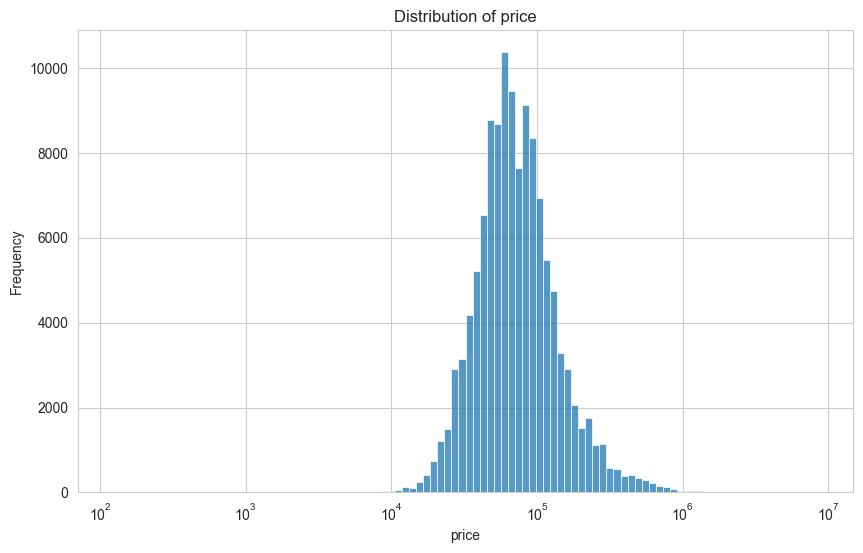

In [15]:
# Plotting distributions 'price'
plot_distribution('price', df, bins=100, kde=False, log_scale=True)  # Large range of values

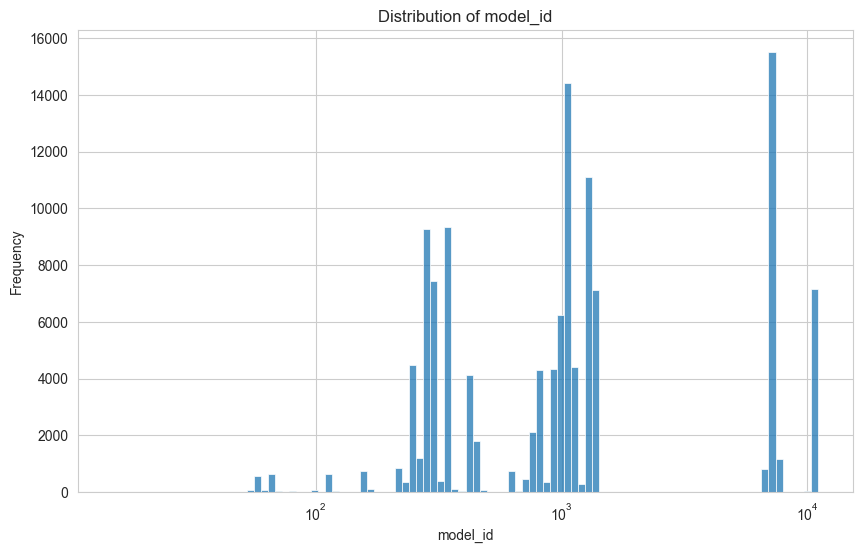

In [14]:
# Plotting distributions 'model_id'
plot_distribution('model_id', df, bins=100, kde=False, log_scale=True)  # Large range of values

# Data Distributions Conclusions

## Model Year:
- The distribution is left-skewed, with most cars being from recent years.
- The majority of cars are from the years 2010 to 2024, which is expected in a typical car dataset.

## Kilometers (km):
- The distribution is heavily right-skewed.
- There are significant outliers, as indicated by the long tail extending to very high km values.
- Most cars have mileage under 200,000 km, but outliers with extremely high mileage values might need to be addressed.

## Price:
- This distribution is also right-skewed with notable outliers.
- While most car prices are clustered at the lower end, there are cars with exceptionally high prices.
- The extreme maximum values suggest either luxury/high-value cars or potential data errors.

## Model ID:
- The frequency analysis shows that some model IDs are much more common than others. This indicates popularity or prevalence of certain car models over others within the dataset.
- Due to the large range of repeated IDs compared to other categorical data, separate analysis from other columns is warranted.
- Further analysis into which IDs are most common, and if the spread is variable enough and unpredictable enough for clustering would be beneficial.

# Outlier Data

## Box Plots

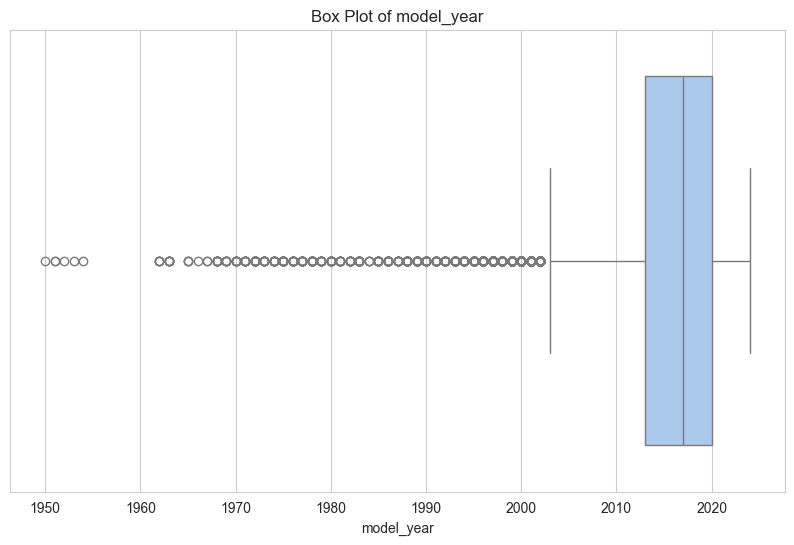

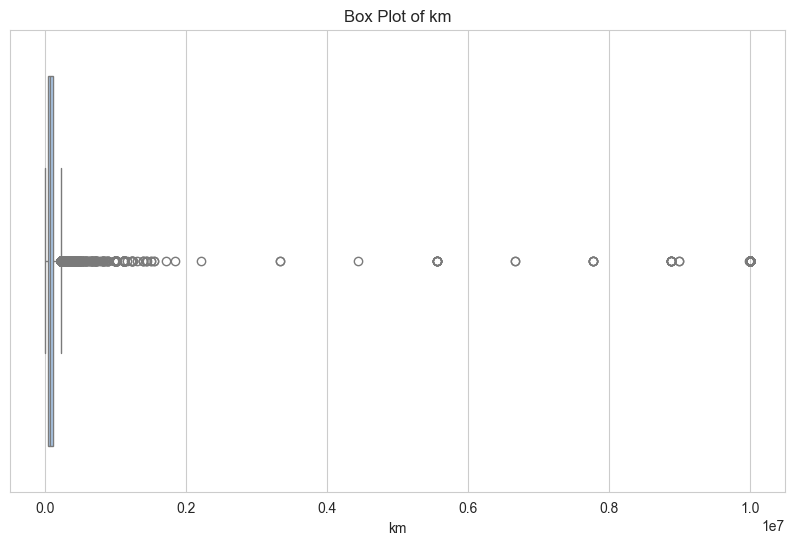

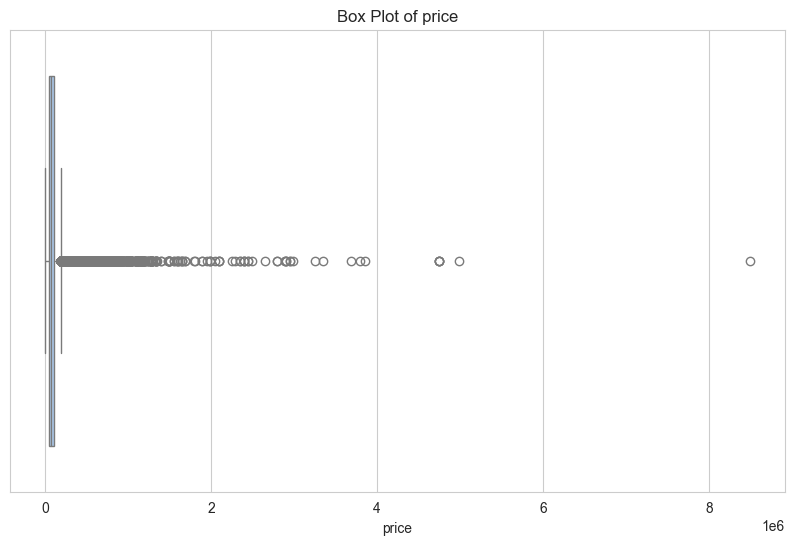

In [119]:
# Box Plots for Columns of Interest

# Function to create box plots for given columns
def plot_boxplot(column, data):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=data[column])
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
    plt.show()

# Creating box plots
plot_boxplot('model_year', df)
plot_boxplot('km', df)
plot_boxplot('price', df)

## Box Plot Conclusions

### Kilometers (km):
- There are numerous outliers significantly above the upper quartile, indicating cars with unusually high mileage.
- Given that high mileage might be relevant for clustering (as it significantly affects a car's value and condition), we need to carefully consider whether to remove or retain these outliers.

### Price:
- Similar to `km`, the `price` distribution has many outliers far beyond the upper quartile.
- Extremely high prices could represent luxury or rare vehicles, which might be a separate cluster in themselves, or they could be data errors.

# Distribution and Uniqueness of Model ID

To understand in detail the distribution and uniqueness of `model_id`, the number of unique values, the frequency of each model_id, and any patterns or groupings that may appear will be analyzed.

Calculating the entropy of the `model_id` column will help clarify its variability and effectiveness in providing information for clustering. This metric will help determine if `model_id` contributes significantly to distinguishing between different data points.

In [7]:
# Extract and format the top 5 frequent model_ids
top_5_model_ids = df['model_id'].value_counts().head(5)
formatted_top_5 = "\n".join([f"Model ID {idx}: Count = {count}" for idx, count in top_5_model_ids.items()])

# Print the top 5 model_ids separately for clarity
print("Top 5 Frequent Model IDs:")
print(formatted_top_5)
print("\nOther Model ID Analysis:")

# Analyze 'model_id' for clustering potential
model_id_analysis = {
    "Unique Values": df['model_id'].nunique(),
    "Total Values": df['model_id'].count(),
    "Entropy": entropy(df['model_id'].value_counts(normalize=True))
}

# Print other model_id analysis
for key, value in model_id_analysis.items():
    print(f"{key}: {value}")

Top 5 Frequent Model IDs:
Model ID 277: Count = 4698
Model ID 336: Count = 3509
Model ID 1004: Count = 3320
Model ID 411: Count = 2924
Model ID 1350: Count = 2879

Other Model ID Analysis:
Unique Values: 613
Total Values: 123358
Entropy: 4.875592408663312


## Model ID Conclusions

- The distribution of model_id features `613` unique values within the dataset, reflecting a broad variety of models.
- The entropy calculation yielded a value of approximately `4.88`, indicating a high level of variability and unpredictability. This suggests that `model_id` is a good candidate for clustering as it contributes significant information by distinguishing between different groups.
- The frequency analysis shows that some model IDs are much more common than others, with the most frequent model appearing `4,698` times. This indicates popularity or prevalence of certain car models over others within the dataset.

`model_id` has enough variance and unpredictability to be a good candidate for clustering.

# Count Plots

Before deciding on the treatment of these outliers, let's analyze other categorical columns relevant for clustering: `fuel_id`, `doors`, `transmission_id`, and `body_style_id`. Understanding the distribution of these categories will help us better understand the dataset and inform our decision on handling outliers.

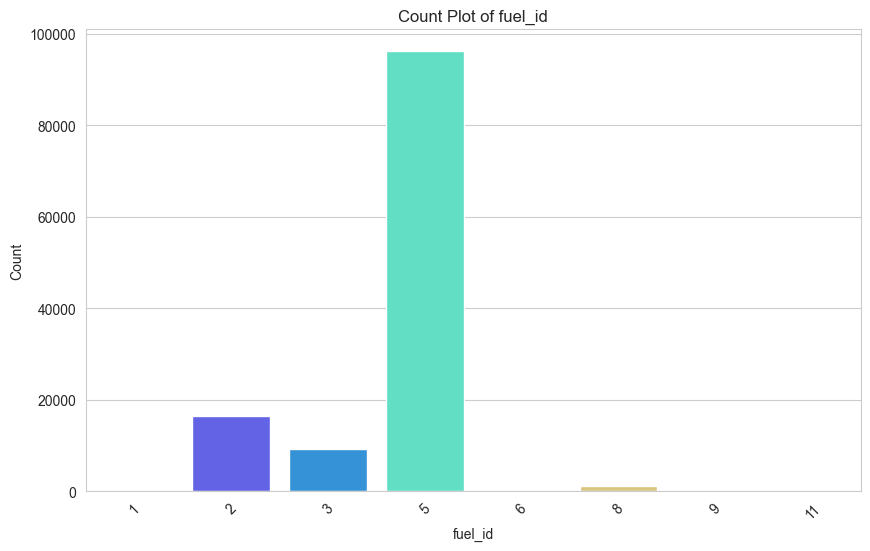

In [12]:
# Function to create count plots for categorical columns
def plot_countplot(column, data):
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column, hue=column, data=data, palette='rainbow', legend=False)
    plt.title(f'Count Plot of {column}')
    plt.ylabel('Count')
    plt.xlabel(column)
    plt.xticks(rotation=45)
    plt.show()

# Creating count plots for 'fuel_id'
plot_countplot('fuel_id', df)

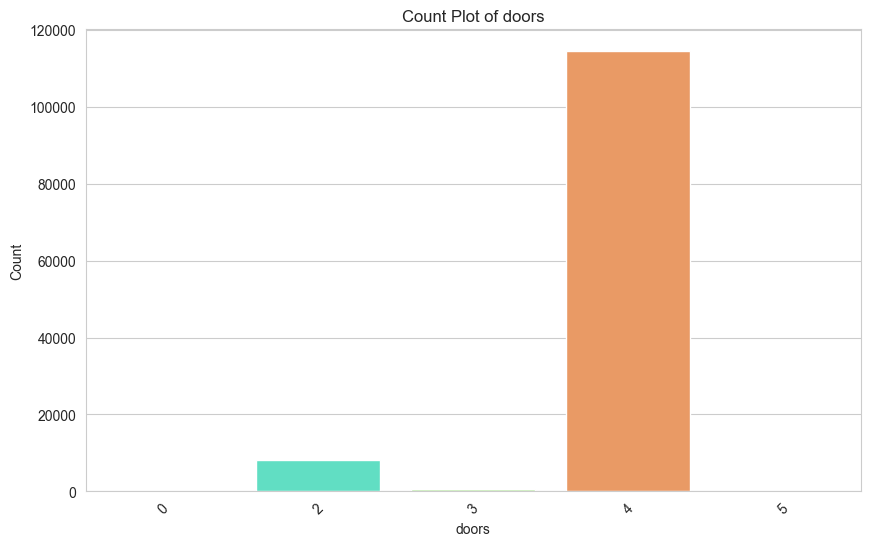

In [91]:
# Creating count plots for 'doors'
plot_countplot('doors', df)

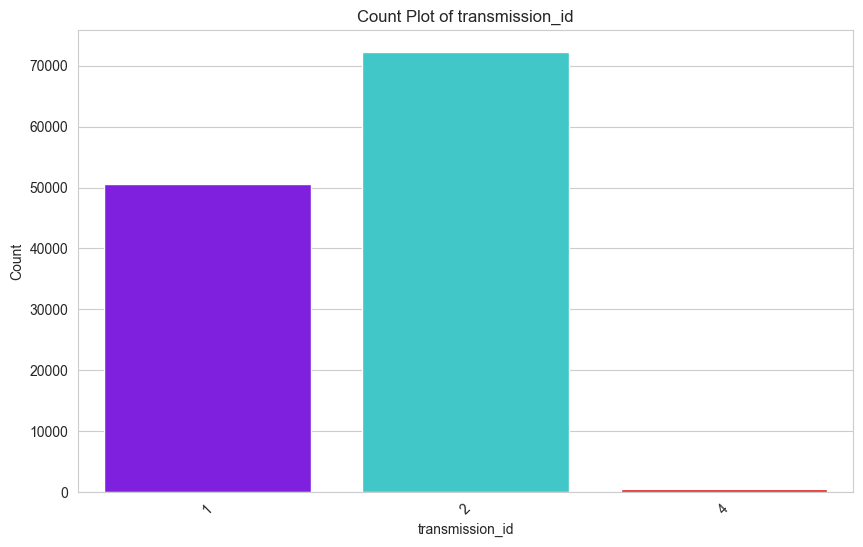

In [92]:
# Creating count plots for 'transmission_id'
plot_countplot('transmission_id', df)

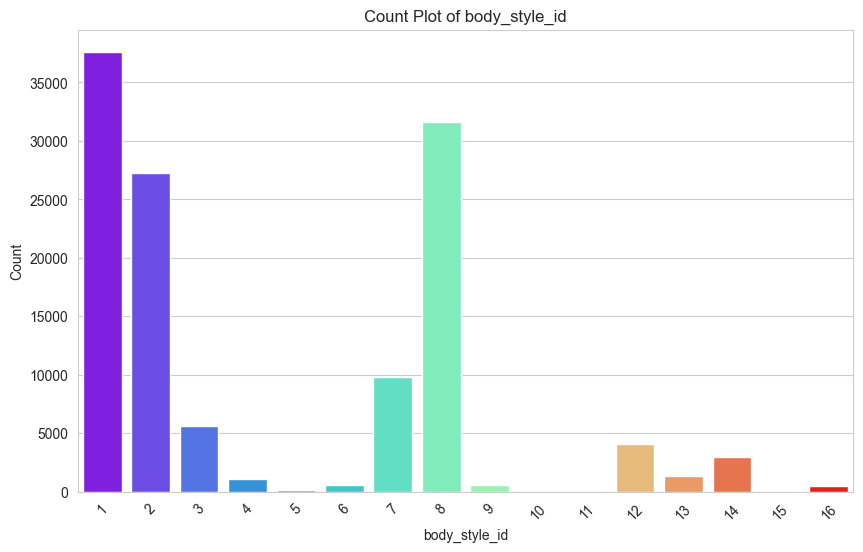

In [93]:
# Creating count plots for 'body_style_id'
plot_countplot('body_style_id', df)

## Count Plot Conclusions

### Fuel ID:
- The dataset features a variety of fuel types, with one type (presumably "5") being significantly more common than others.

### Doors:
- The majority of cars have 4 doors, which is typical for passenger cars.
- There are also cars with 2, 3, and 5 doors, but they are less common.

### Transmission ID:
- Two types of transmissions dominate the dataset. This likely represents automatic and manual transmissions.

### Body Style ID:
- The dataset contains a diverse range of body styles.
- Some styles are much more common than others, indicating a variety of car types.

# Correlation

## Correlation Matrix

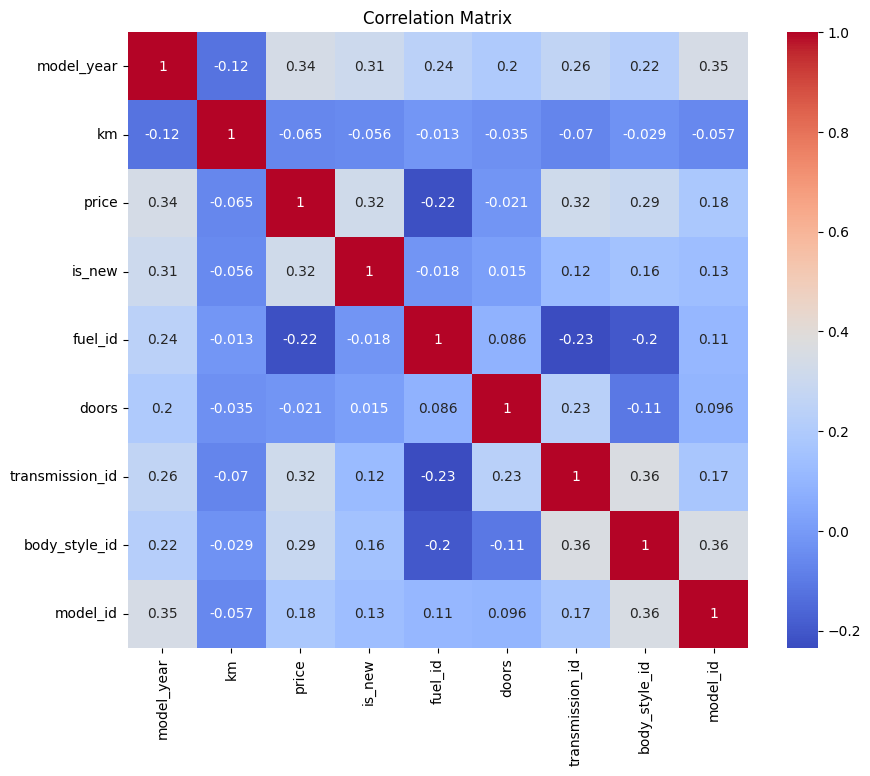

In [8]:
# Heatmap for correlation
# Dark Red=high correlation, Dark Blue=low correlation

correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Correlation Matrix Conclusions

- There are no extremely high correlations between pairs of variables, which is generally a positive sign when considering multicollinearity.
- Some moderate correlations exist, such as between `transmission_id` and `body_style_id`, but these are not strong enough to indicate severe multicollinearity issues on their own.

## Variance Inflation Factor

In [9]:
# To assess multicollinearity further, we will also calculate the Variance Inflation Factor (VIF)
# Function to calculate VIF for each feature
def calculate_vif(data, columns_to_drop=None):
    vif_data = pd.DataFrame()
    if columns_to_drop is not None:
        data = data.drop(columns=columns_to_drop)  # Drop the list of columns

    vif_data["feature"] = data.columns
    vif_data["VIF"] = [variance_inflation_factor(data.values, i) for i in range(len(data.columns))]
    return vif_data

# Calculating VIF
vif_data = calculate_vif(df)
print(vif_data)

           feature        VIF
0       model_year  84.602553
1               km   1.068194
2            price   2.304657
3           is_new   1.191952
4          fuel_id  18.360970
5            doors  68.589060
6  transmission_id  14.662562
7    body_style_id   3.479130
8         model_id   1.885843


In [10]:
# Calculate VIF without `model_year`
vif_data = calculate_vif(df, ['model_year'])
print(vif_data)

           feature        VIF
0               km   1.062334
1            price   2.262333
2           is_new   1.188678
3          fuel_id  14.327697
4            doors  28.281088
5  transmission_id  14.399013
6    body_style_id   3.252782
7         model_id   1.825901


In [11]:
# Calculate VIF without `doors`
vif_data = calculate_vif(df, ['doors'])
print(vif_data)

           feature        VIF
0       model_year  34.883875
1               km   1.067988
2            price   2.293558
3           is_new   1.191672
4          fuel_id  18.239823
5  transmission_id  13.306587
6    body_style_id   3.319189
7         model_id   1.860910


In [12]:
# Calculate VIF without `doors` or `model_year`
vif_data = calculate_vif(df, ['doors', 'model_year'])
print(vif_data)

           feature       VIF
0               km  1.057566
1            price  2.255684
2           is_new  1.186897
3          fuel_id  5.686204
4  transmission_id  8.511925
5    body_style_id  3.249775
6         model_id  1.823750


## VIF Conclusions

The VIF results show the following:

- **High VIF Values**: The `model_year` and `doors` have high VIF values (84.60 and 68.59 respectively), which suggests multicollinearity. This means these variables can be linearly predicted with considerable accuracy from the other variables in the dataset.
- **Moderate VIF Values**: `fuel_id` and `transmission_id` have moderate VIF values, suggesting a milder level of multicollinearity.
- **Low VIF Values**: `km`, `price`, `is_new`, `body_style_id`, and `model_id` show low VIF values, indicating low multicollinearity with other variables (VIF values greater than 5 or 10 are considered significant depending on the source of the data).

### Implications for Clustering

- **Multicollinearity Consideration**: While multicollinearity is primarily a concern in regression analysis, its presence can indicate overlapping information in clustering. High VIF values for `model_year` and `doors` suggest these features might not be providing unique information for clustering.
- **Feature Selection**: Removing or combining features with high multicollinearity (like model_year and doors) on clustering results may simplify the model and clustering.
- **Clustering Approach**: Since clustering is less sensitive to multicollinearity compared to regression models, we can still use all features, but it's essential to understand the overlaps in information they provide.

# EDA Conclusion

## Handling Outliers and Final Analysis

- Considering the analysis so far, the outliers in the `km` and `price` columns should be treated with caution. They might represent unique or special categories of cars (like luxury or vintage cars) that are important for clustering. However, if the focus is on standard consumer vehicles, these outliers might skew the results and could be removed or treated separately.

- **Columns for Clustering**: The columns `model_year`, `km`, `price`, `is_new`, `fuel_id`, `doors`, `transmission_id`, `model_id`, and `body_style_id` are relevant for clustering cars into similar groups.

- **Outliers**: Outliers in `km` and `price` need careful consideration based on the clustering objectives. They can be removed, capped, or treated as separate categories.

- **Multicollinearity**: High VIF values for `model_year` and `doors` suggest these features might not be providing unique information for clustering and could possibly be eliminated (for example, `is_new` and `price` could be accurately predicting new cars, and `model_year` is less relevant). However, clustering is known to handle multicollinearity just fine, so it might not be necessary to consider this during feature selection. 

- **Data Scaling**: Columns like `km` and `price` should be scaled appropriately to ensure they are given equal importance during clustering.